# Contrastive analysis of SA network to ER/BA random networks

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Reading network data and defining certain features of the SA network

In [2]:
G = nx.read_gexf('SA.gexf')
nodes = G.nodes()
edges = G.edges()
N = len(nodes)
L = len(edges)
print(f'Number of nodes in SA network: {N}')
print(f'Number of links in SA network: {L}')
print(f'Average degree of SA network: {2*L/N:.2f}')

Number of nodes in SA network: 1879
Number of links in SA network: 4291
Average degree of SA network: 4.57


Defining random networks with same amount of nodes and same or similar amount of links

In [3]:
G_er = nx.erdos_renyi_graph(N, 2*L/(N*(N-1)))
G_ba = nx.barabasi_albert_graph(N, round(L/N))

Checking initially simply the maximum degrees of all networks

In [4]:
print(f'SA network maximum degree: {max(dict(G.degree()).values())}')
print(f'ER network maximum degree: {max(dict(G_er.degree()).values())}')
print(f'BA network maximum degree: {max(dict(G_ba.degree()).values())}')

SA network maximum degree: 145
ER network maximum degree: 14
BA network maximum degree: 91


Now initially seems clear that SA network is more similar to BA network. Now defining function for plotting data, so this can be verified further

In [5]:
def plot_degree_distribution(G, title=None, log_scale=False):
    k = [degree for _, degree in G.degree()]
    unique_degs = len(np.unique(k))
    n_bins = 30 if unique_degs >= 30 else unique_degs
    if log_scale:
        bins = np.logspace(np.log10(np.min(k)), 
                           np.log10(np.max(k)), 
                           num=n_bins)
        plt.hist(k, density=True, bins=bins)
        plt.xscale('log')
        plt.yscale('log',nonpositive='clip')
    else:
        plt.hist(k, n_bins, density=True)
    plt.title(title)
    plt.xlabel('degree')
    plt.ylabel('%')
    plt.xlim(min(k), max(k))
    plt.show()

Plotting the degree distributions for all the networks

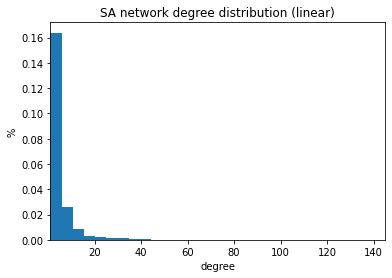

In [6]:
plot_degree_distribution(G, 'SA network degree distribution (linear)', False)

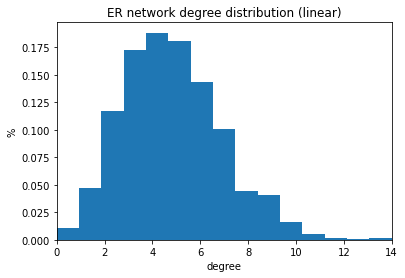

In [7]:
plot_degree_distribution(G_er, 'ER network degree distribution (linear)', False)

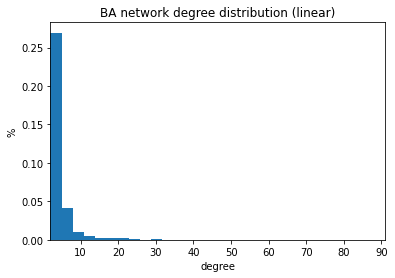

In [8]:
plot_degree_distribution(G_ba, 'BA network degree distribution (linear)', False)

Clearly it seems like the SA network is much more comparable to the scale-free BA network. To confirm this finally we can plot the two networks in log-scale also using log-scale binning.

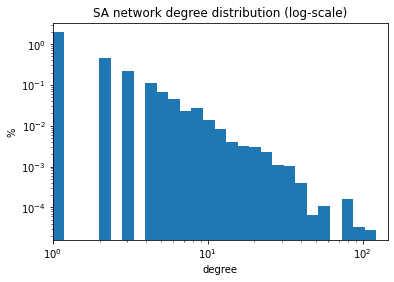

In [9]:
plot_degree_distribution(G, "SA network degree distribution (log-scale)", True)

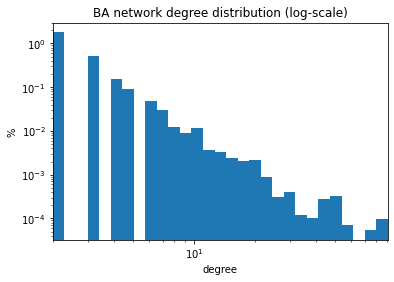

In [10]:
plot_degree_distribution(G_ba, "BA network degree distribution (log-scale)", True)

Now it is clear that they exhibit exhibit extremely similar qualities, so the SeekingAlpha network can be thought of as having scale-free properties. Now for more statistics of the network we can calculate and contrast the first, second, and third moments of the networks. The first moment should be similar with all networks, as it was used to define the two random networks. However, BA network's first moment is rounded down, which will slightly affect the results.

In [11]:
 def nth_moment(G, n):
    degrees = np.array(list(dict(G.degree).values()))
    return np.sum(degrees**n)/len(degrees)

In [12]:
moments = ['First', 'Second', 'Third']
for i, nth in enumerate(moments):
    print(f'{nth} moment of SA network: {nth_moment(G, i+1)}')
    print(f'{nth} moment of ER network: {nth_moment(G_er, i+1)}')
    print(f'{nth} moment of BA network: {nth_moment(G_ba, i+1)}\n')

First moment of SA network: 4.567323044172432
First moment of ER network: 4.685470995210218
First moment of BA network: 3.9957424161788184

Second moment of SA network: 85.48696114954762
Second moment of ER network: 26.920702501330496
Second moment of BA network: 46.84619478445982

Third moment of SA network: 5033.624268227781
Third moment of ER network: 178.42682277807344
Third moment of BA network: 1863.7211282597127

